In [2]:
surname = "Новиков"  # Ваша фамилия

alp = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
w = [1, 42, 21, 21, 34,  6, 44, 26, 18, 44, 38, 26, 14, 43,  4, 49, 45,
        7, 42, 29,  4,  9, 36, 34, 31, 29,  5, 30,  4, 19, 28, 25, 33]

d = dict(zip(alp, w))
variant =  sum([d[el] for el in surname.lower()]) % 40 + 1

print("Задача № 1, шаг 5 - вариант: ", variant % 5 + 1)
print("Задача № 1, шаг 11 - вариант: ", variant % 2 + 1 )
print("задача № 2 - вариант: ", variant % 4 + 1)

Задача № 1, шаг 5 - вариант:  1
Задача № 1, шаг 11 - вариант:  2
задача № 2 - вариант:  4


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Согласно заданию необходимо:
    
1. Загрузить данные в `DataFrame`

In [85]:
# Загружаем данные
df1 = pd.read_excel("./data/wgidataset.xlsx")

# Оставим только Control of Corruption
df1 = df1[df1['indicator'] == 'cc']

# Заменяем все значения ".." на NaN
df1.replace('..', pd.NA, inplace=True)

2. Отсоровать данные по убыванию `pctrank`

In [86]:
# Оставляем только нужные столбцы
df2 = df1[['pctrank', 'estimate', 'year', 'countryname']]
# Оставляем только данные за 2023 год
df2 = df2[df1['year'] == 2023]

# Удаляем строки с NaN в pctrank
df2 = df2.dropna(subset=['pctrank'])

# Сортируем по столбцу `pctrank` (по возрастанию)
df2.sort_values('pctrank', ascending=False, inplace=True)

3. Отобразить данные по индексу *WGI* за 2023 год в виде горизонтального столбчатого графика (`pctrank`).

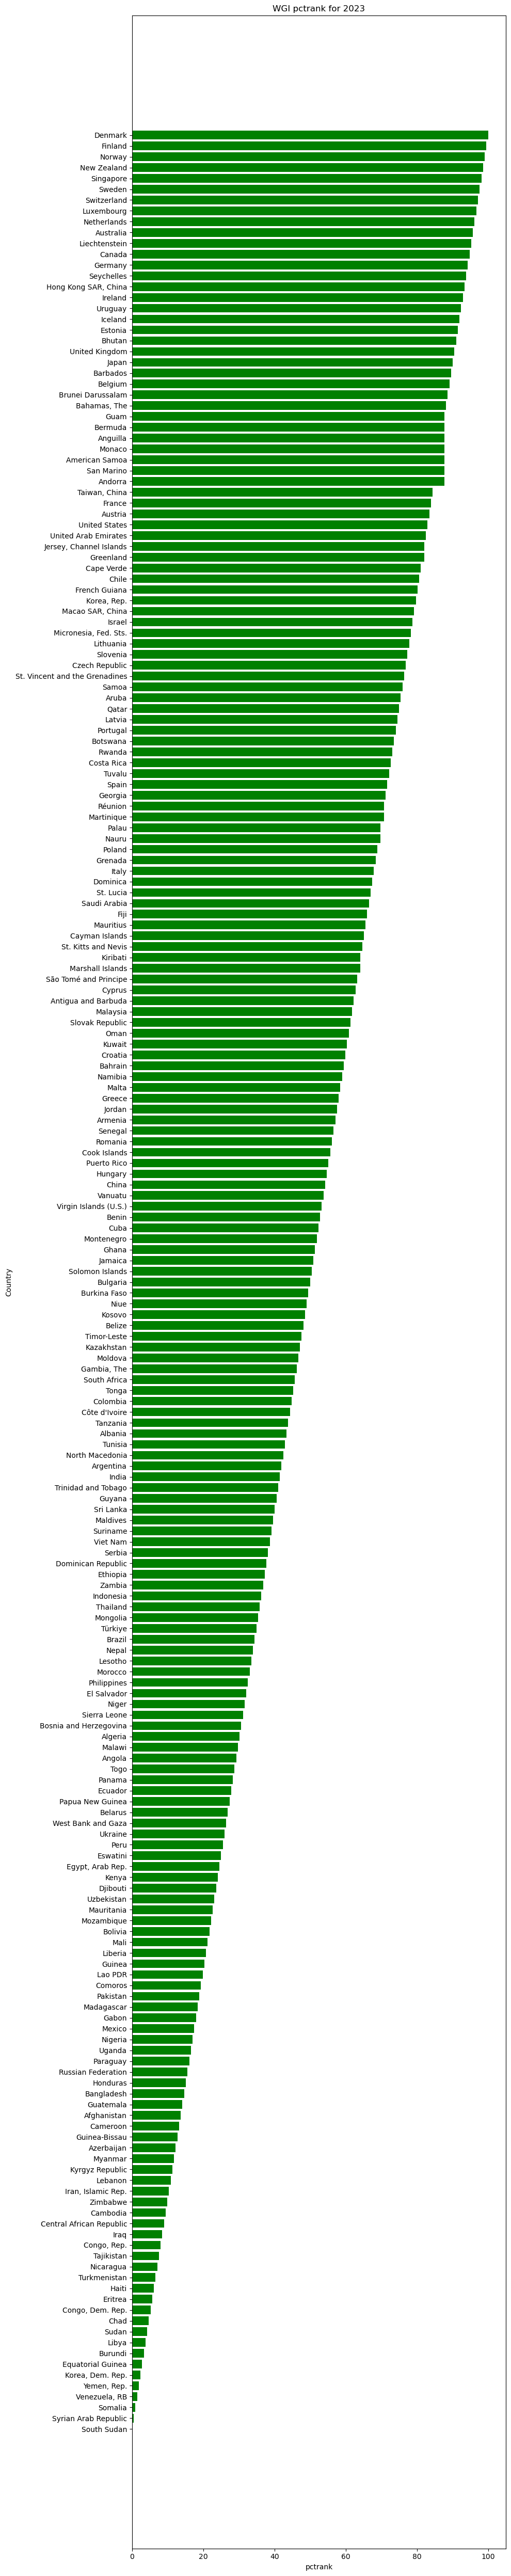

In [87]:
# Строим горизонтальную столбчатую диаграмму
plt.figure(figsize=(10, 50))
plt.barh(df2['countryname'], df2['pctrank'], color='green')

# Инвертируем ось Y, чтобы лучшие были сверху
plt.gca().invert_yaxis()

# Подписываем оси
plt.xlabel("pctrank")
plt.ylabel("Country")
plt.title("WGI pctrank for 2023")

# Показываем график
plt.tight_layout()
plt.show()

Следующий шаг - сформировать data frame из данных по региону: 
**Asia Pacific**

для этого сначала загрузим датафрейм с регионами:

In [88]:
df_regions = pd.read_excel("./data/regions.xlsx")

Объединим датафреймы по коду страны 
и оставляем только **Asia Pacific**

In [89]:
df_merged = df1.merge(df_regions, left_on="code", 
                      right_on="Code", how="left")
df_merged = df_merged.dropna(subset=['Region'])
df_asia_pacific = df_merged[
    (df_merged["Region"] == "AP") & 
    (df_merged["year"].between(1996, 2023))
][["countryname", "year", "estimate"]]


df_asia_pacific

,countryname,year,estimate
0,Afghanistan,1996,-1.291705
11,Australia,1996,1.877356
16,Bangladesh,1996,-0.969682
23,Bhutan,1996,0.942838
32,Cambodia,1996,-1.019842
...,...,...,...
5313,Sri Lanka,2023,-0.383977
5323,"Taiwan, China",2023,1.203369
5326,Thailand,2023,-0.489051
5342,Vanuatu,2023,-0.014865


Отсортируем данные по:
    1. странам 
    2. годам

In [90]:
df_asia_pacific = df_asia_pacific.sort_values(by=["countryname", "year"])

Сформируем набор стран региона:

In [91]:
countries = df_asia_pacific["countryname"].unique()

Теперь строим график:

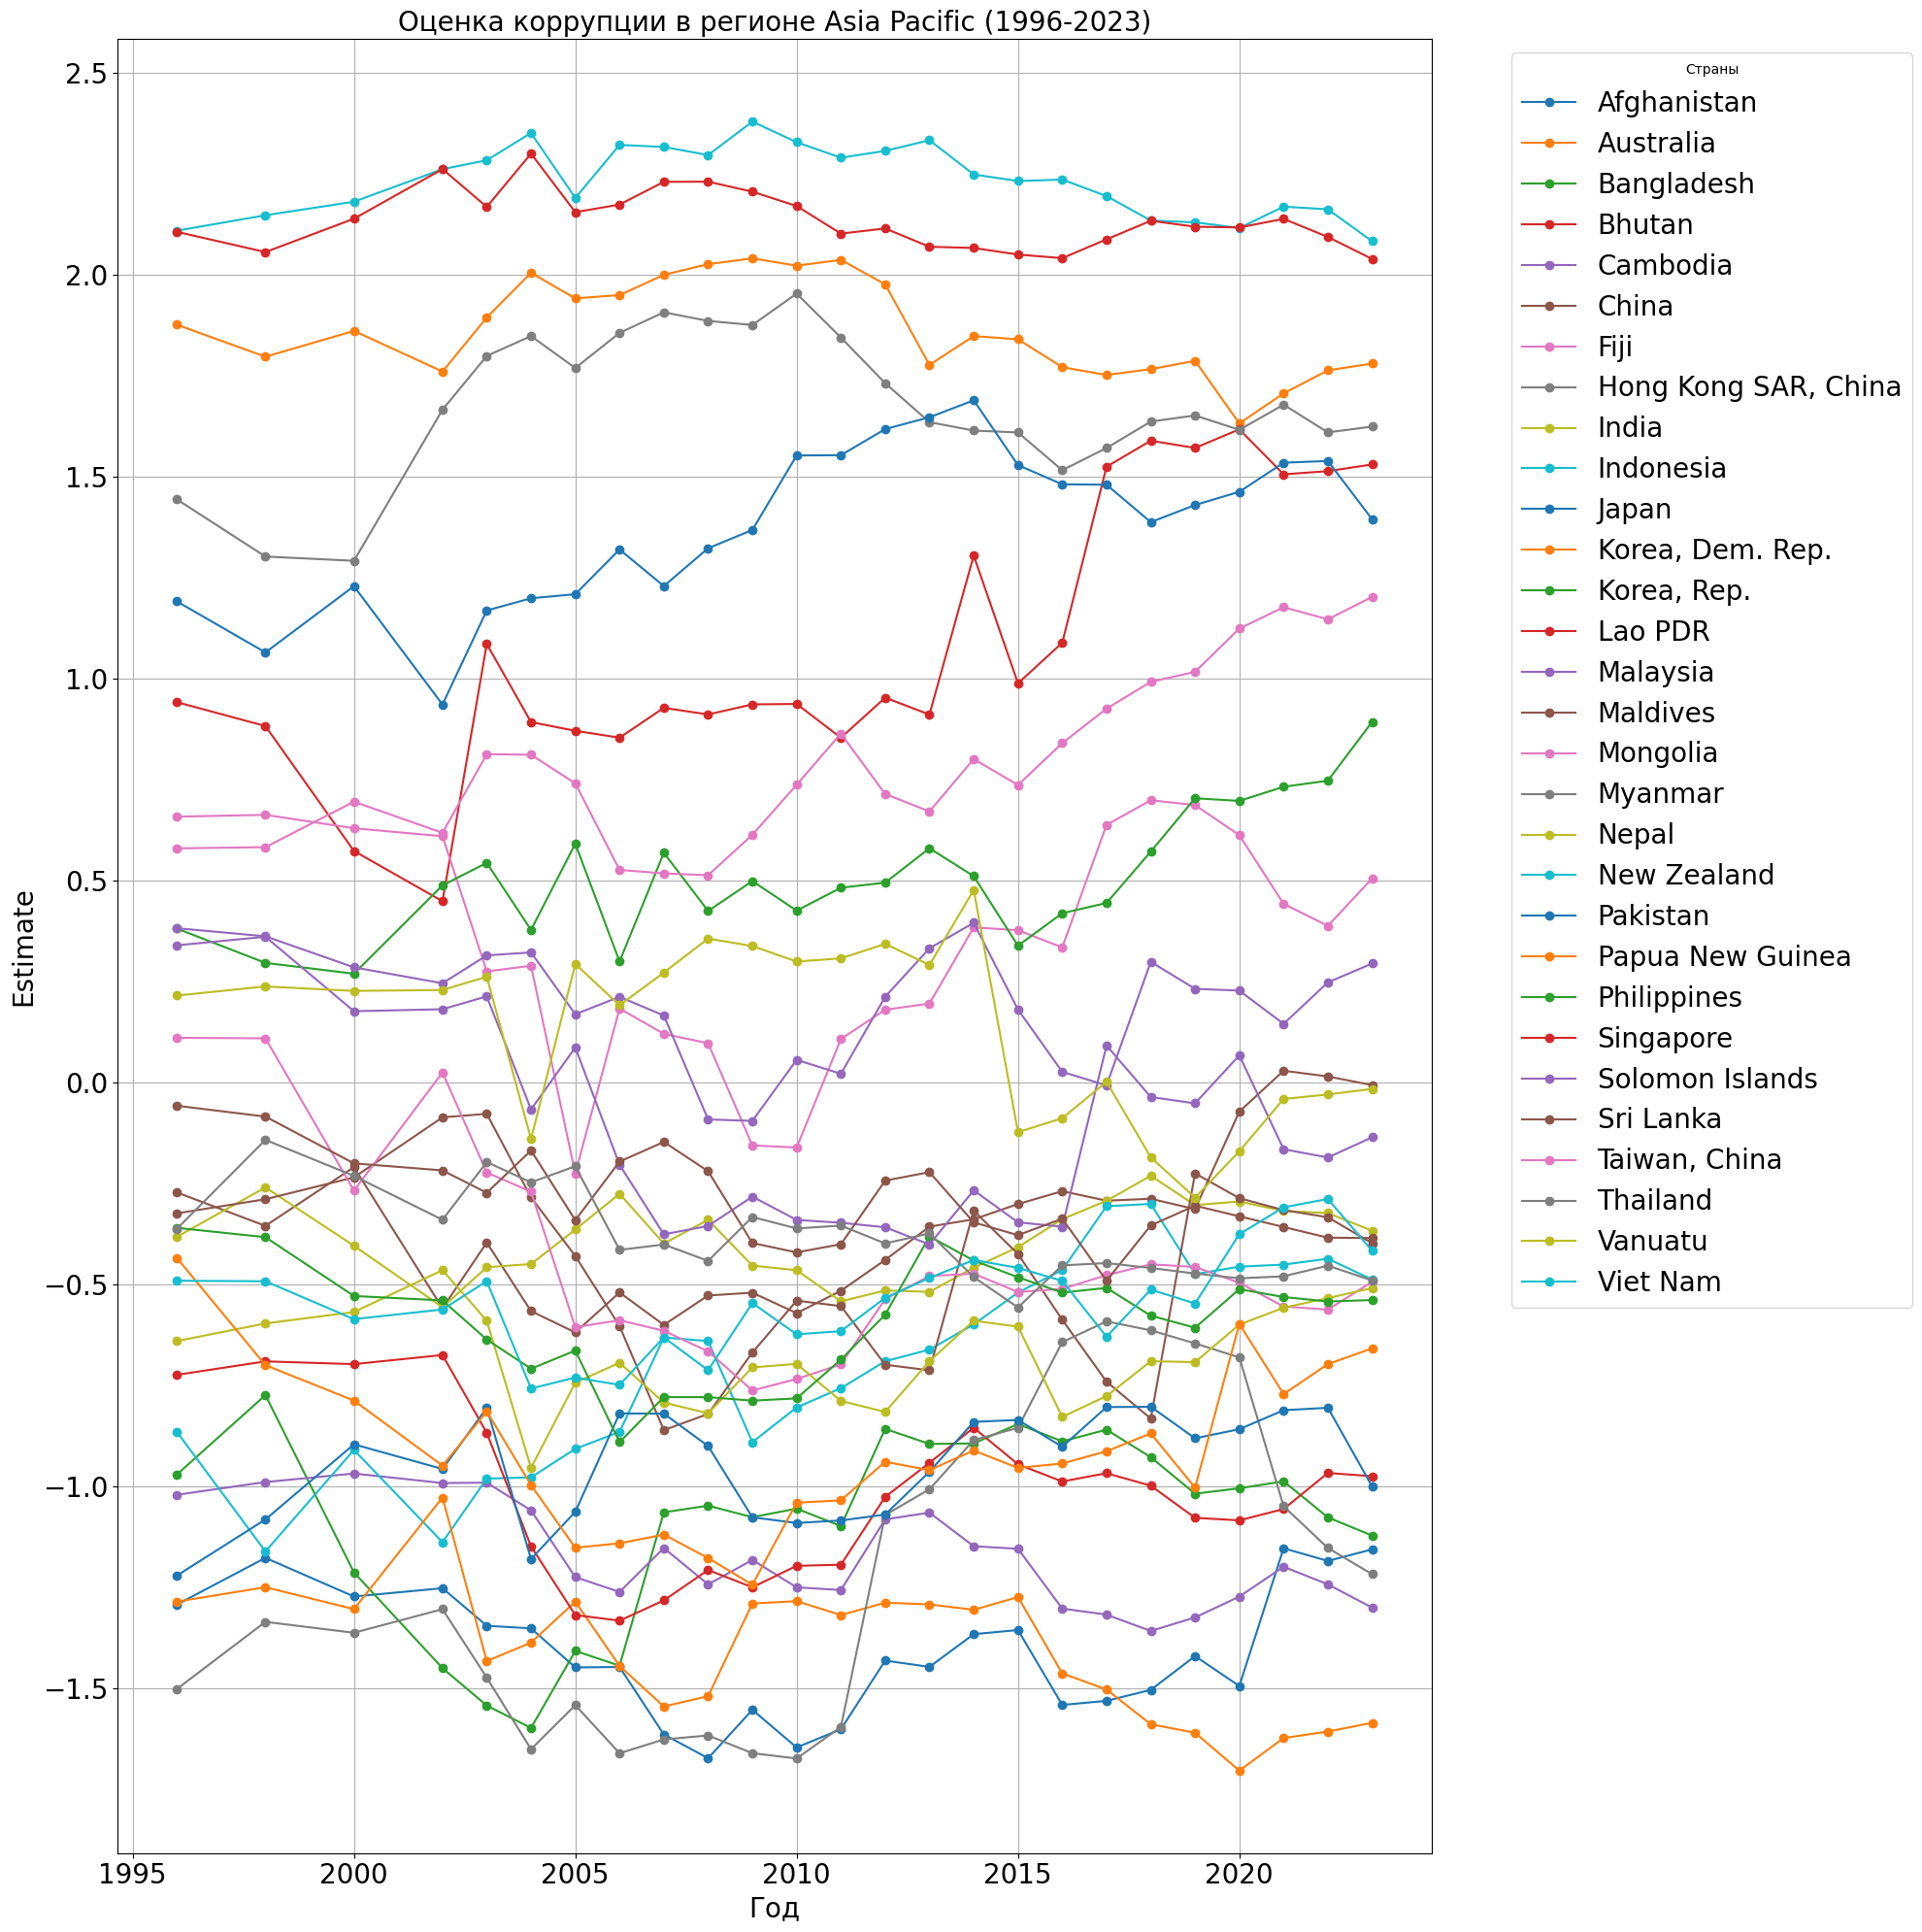

In [105]:
# Убираем все строки с NaN в 'estimate' и 'year' (если нужно)
df_asia_pacific = df_asia_pacific.dropna(subset=['estimate', 'year'])

# Создаем фигуру для графика
plt.figure(figsize=(20, 20))

# Получаем список стран
countries = df_asia_pacific['countryname'].unique()

# Для каждой страны строим отдельную линию на графике
for country in countries:
    country_data = df_asia_pacific[df_asia_pacific["countryname"] == country]
    plt.plot(country_data["year"], country_data["estimate"], label=country, marker='o')

# Подписываем оси
plt.xlabel("Год", fontsize=20)
plt.ylabel("Estimate", fontsize=20)
plt.title("Оценка коррупции в регионе Asia Pacific (1996-2023)", fontsize=20)

# Настройка размера шрифта для цифр значений на осях
plt.tick_params(axis='both', which='major', labelsize=20)

# Добавляем легенду
plt.legend(title="Страны", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=20)

# Добавляем сетку
plt.grid(True)

# Показываем график
plt.tight_layout()
plt.show()